In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import api_key

from citipy import citipy

output_data_file = "cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
# OpenWeatherMap API Key
api_key = "9651757ef9403d20114a48f90326c16c"


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" 
    
df_cities = pd.DataFrame(cities)
df_cities = df_cities.rename(columns={0:"city"})
df_cities["temp_max"]=""
df_cities['date'] = ""
df_cities['country'] = ""
df_cities['lat'] = ""
df_cities['lon'] = ""
df_cities['hum'] = ""
df_cities['cloud'] = ""
df_cities['wind'] = ""
df_cities['country'] = ""

for i, row in df_cities.iterrows():
    city = row["city"]
    response = requests.get(url + city).json()
    print(city + " "+ str(i))
    
    try:
        df_cities.loc[i, 'temp_max'] = response['main']['temp_max']
        df_cities.loc[i, 'date'] = response['dt']
        df_cities.loc[i, 'country'] = response['sys']['country']
        df_cities.loc[i, 'lat'] = response['coord']['lat']
        df_cities.loc[i, 'lon'] = response['coord']['lon']
        df_cities.loc[i, 'hum'] = response['main']['humidity']
        df_cities.loc[i, 'cloud'] = response['clouds']['all']
        df_cities.loc[i, 'wind'] = response['wind']['speed']        
    except:
        print("error")

marawi 0
mataura 1
thompson 2
saint-augustin 3
dmitriyevka 4
busselton 5
souillac 6
jamestown 7
victoria 8
marcona 9
error
hobart 10
nanortalik 11
tiksi 12
novikovo 13
provideniya 14
sabang 15
linares 16
albany 17
luderitz 18
fortuna 19
mar del plata 20
caravelas 21
bredasdorp 22
hilo 23
ntoum 24
ratanpur 25
mehamn 26
kraluv dvur 27
bathsheba 28
sur 29
leningradskiy 30
castro 31
harsin 32
vaini 33
la cruz 34
ushuaia 35
port blair 36
puerto ayora 37
beringovskiy 38
kavieng 39
punta arenas 40
narsaq 41
srednekolymsk 42
ndele 43
error
chuy 44
atuona 45
los llanos de aridane 46
korla 47
error
bluff 48
college 49
takhtamygda 50
maragogi 51
ponta do sol 52
kaitangata 53
belushya guba 54
error
vila 55
ngukurr 56
error
carnarvon 57
nikolskoye 58
new norfolk 59
bolshaya dzhalga 60
kapaa 61
seoul 62
hermanus 63
hasaki 64
tsihombe 65
error
cape town 66
san cristobal 67
solnechnyy 68
guantanamo 69
las palmas 70
port alfred 71
rikitea 72
lasa 73
esperance 74
ewa beach 75
nome 76
tapiramuta 77
khata

shebunino 584
camargo 585
smiltene 586
olafsvik 587
error
mahajanga 588
sao joao do piaui 589
bantry 590
error
chum phae 591
filadelfia 592
margate 593
hay river 594
mount isa 595
aybak 596
error
lolua 597
error
karratha 598
anchorage 599
juybar 600
lucea 601
tiznit 602
katangli 603
jiayuguan 604
rawah 605
error
bucak 606
zhezkazgan 607
muros 608
tezpur 609
ovalle 610
barinas 611


In [4]:
df_cities

,city,temp_max,date,country,lat,lon,hum,cloud,wind
0,marawi,67.2,1548522581,PH,8,124.29,100,92,2.46
1,mataura,53.74,1548522520,NZ,-46.19,168.86,91,0,9.4
2,thompson,-36.41,1548518400,CA,55.74,-97.86,65,5,8.05
3,saint-augustin,51.8,1548520200,FR,44.83,-0.61,81,90,12.75
4,dmitriyevka,40.38,1548522582,GE,43.08,41,100,100,3.91
5,busselton,61.08,1548522582,AU,-33.64,115.35,100,0,16.67
6,souillac,50,1548520200,FR,45.6,-0.6,87,75,11.41
7,jamestown,59.77,1548522315,AU,-33.21,138.6,86,92,7.72
8,victoria,75.2,1548520200,BN,5.28,115.24,100,75,3.36
9,marcona,,,,,,,,


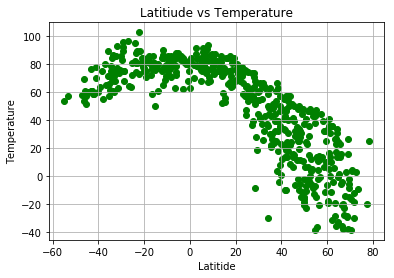

In [5]:
df_cities.dtypes

df_cities["lat"] = pd.to_numeric(df_cities["lat"])
df_cities["temp_max"] = pd.to_numeric(df_cities["temp_max"])

plt.scatter(df_cities["lat"], df_cities["temp_max"], marker="o", facecolors="green")
plt.title("Latitiude vs Temperature")
plt.xlabel("Latitide")
plt.ylabel("Temperature")
plt.grid()
plt.savefig("temp_lat.png")

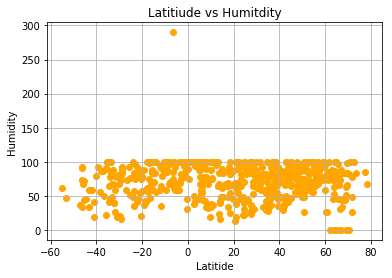

In [6]:
df_cities.dtypes

df_cities["hum"] = pd.to_numeric(df_cities["hum"])

plt.scatter(df_cities["lat"], df_cities["hum"], marker="o", facecolors="orange")
plt.title("Latitiude vs Humitdity")
plt.xlabel("Latitide")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("temp_hum.png")

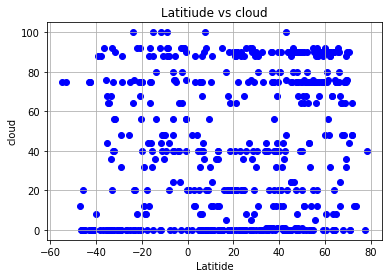

In [7]:
df_cities.dtypes

df_cities["cloud"] = pd.to_numeric(df_cities["cloud"])

plt.scatter(df_cities["lat"], df_cities["cloud"], marker="o", facecolors="blue")
plt.title("Latitiude vs cloud")
plt.xlabel("Latitide")
plt.ylabel("cloud")
plt.grid()
plt.savefig("temp_cloud.png")

In [8]:
df_cities.to_csv('data.csv')